KL-DIV Loss & bcewithlogits
a = lambda_1 * kl_loss(torch.log(sigmoid(output)), sigmoid(target))  # kl-div between models' logits
b = lambda_2 * bce_with_logits_loss(x_attention, target_off_patches)  # turn off patches
loss = a + b

In [457]:
len(torch.tensor([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
                                         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
                                         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
                                         0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
                                         0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                                         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
                                         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
                                         0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
                                         0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
                                         0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
                                         1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0.,
                                         0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
                                         0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
                                         0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
                                         1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                                         0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0.,
                                         1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
                                         1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                                         0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
                                         0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
                                         1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
                                         0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
                                         0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
                                         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
                                         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
                                         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
                                         0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
                                         0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
                                         1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                                         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
                                         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
                                         0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
                                         0.])[1:])

576

In [8]:
import torch
from torch import nn
from torch.functional import F
sigmoid = nn.Sigmoid()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


def plot_sorted_vector(vector, apply_sigmoid=False):
    if apply_sigmoid:
        vector = sigmoid(vector)
    plt.plot(sorted(vector))
    plt.show()

In [13]:
p_dist = torch.tensor([0.4, 0.6])

In [16]:
sum([-p * torch.log2(p)  if p> 0 else 0 for p in p_dist])

tensor(0.9710)

In [23]:
from torch import Tensor
def entropy(p_dist: Tensor) -> Tensor:
    return sum([-p * torch.log2(p) for p in p_dist])

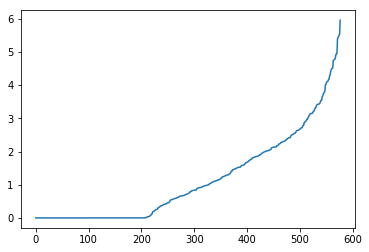

In [10]:
plot_sorted_vector(t)

In [9]:
# x_attention after 300 iterations
res = torch.tensor([-2.8184, -4.7996, -3.9876, -3.8566, -4.4115, -3.4584, -3.6320, -4.2050,
        -2.5787, -4.6619, -3.8523, -3.5725, -3.4671, -2.7178, -4.1536, -3.8887,
        -3.8931, -3.1549, -3.6802, -3.0625, -3.2734, -4.7032, -2.8972, -3.5063,
        -5.1010, -3.8552, -2.9512, -3.9779, -2.5523, -3.7957, -3.3778, -4.1568,
        -3.7028, -3.9606, -3.0218, -3.5421, -3.2393, -3.1208, -3.7183, -3.2857,
        -3.0501, -2.7852, -3.8137, -3.9912, -2.9157, -4.6297, -4.3996, -3.4635,
        -3.7410, -2.9361, -2.9620, -3.1821, -2.7995, -5.1582, -3.2100, -4.3372,
        -3.1541, -2.8380, -3.4606, -3.2597, -3.8616, -3.0290, -2.4275, -3.5948,
        -3.2043, -3.0841, -3.7630, -3.2341, -4.3956, -3.5108, -3.6588, -2.7644,
        -4.0912, -3.4974, -3.6481, -3.6089, -3.5644, -3.1645, -4.1679, -2.9145,
        -4.9560, -5.1880, -3.0763, -3.5295, -3.3810, -3.2993, -4.4584, -4.1012,
        -3.8785, -3.9514, -4.2965, -3.0280, -4.9813, -3.1644, -3.7157, -3.2655,
        -5.3294, -4.2827, -3.2674, -3.7456, -4.5520, -3.3815, -3.7310, -2.5915,
        -3.5455, -4.2847, -4.0040, -3.8050, -2.6571, -4.0610, -4.5692, -2.5280,
        -2.6555, -3.9692, -3.3890, -2.4219, -3.3161, -3.2512, -3.3326, -5.4207,
        -2.8438, -3.5895, -3.4908, -5.3590, -3.7851, -2.5956, -4.7386, -3.3242,
        -5.2846, -3.7385, -3.2238, -4.0027, -2.9507, -3.2245, -4.1236, -2.6397,
        -3.5220, -3.3737, -3.6755, -3.1924, -3.8051, -4.7644, -3.2241, -2.7888,
        -4.0930, -3.9382, -3.8593, -3.9183, -3.3216, -3.5097, -3.3534, -3.7520,
        -4.0349, -3.9807, -5.7673, -3.3840, -2.8278, -4.8819, -4.0148, -3.8458,
        -2.9375, -3.4931, -2.7386, -2.7372, -3.4441, -5.2158, -3.1480, -3.3921,
        -3.0774, -3.2735, -3.8847, -3.0859, -3.9169, -4.9288, -3.8050, -2.7170,
        -3.7945, -2.8826, -4.3275, -2.6956, -3.8581, -4.5411, -3.4829, -3.9881,
        -3.8680, -5.0119, -3.3411, -5.2764, -3.4285, -3.9278, -3.3425, -3.5594,
        -4.4187, -4.1260, -4.2796, -3.6290, -2.6529, -2.7349, -3.0277, -3.2690,
        -4.2317, -3.1049, -2.4503, -4.7283, -4.0523, -6.9850, -3.8504, -3.2339,
        -4.2060, -4.8768, -2.4890, -4.9880, -5.6564, -4.6351, -3.1205, -4.1478,
        -4.1146, -3.0239, -3.9716, -3.4918, -5.4409, -2.8216, -2.8346, -3.3728,
        -3.3851, -5.4880, -5.1033, -4.0541, -4.1701, -1.5756, -5.5155, -3.7333,
        -3.4011, -2.9885, -3.2902, -3.4124, -3.2792, -5.5678, -5.2206, -4.1998,
        -4.9369, -3.1814, -3.4633, -3.9757, -3.4554, -4.2759, -3.1663, -3.7787,
        -4.2703, -4.6959, -3.5485, -4.1973, -3.7573, -2.6591, -4.4977, -3.0738,
        -5.2934, -4.1091, -3.0948, -3.1070, -4.7415, -3.8807, -3.5467, -4.6254,
        -2.9388, -2.4847, -2.6123, -2.9113, -2.8680, -4.3454, -3.3710, -3.8751,
        -3.0029, -4.6628, -3.2286, -3.9010, -2.6462, -4.2515, -4.7030, -3.7737,
        -4.1634, -2.9445, -3.3126, -3.4357, -4.9433, -3.2919, -3.4152, -4.1920,
        -2.9611, -2.9165, -3.5409, -2.6245, -2.3818, -3.3360, -4.9532, -3.1914,
        -3.2677, -4.6908, -3.5468, -3.0995, -3.8700, -3.7152, -3.1235, -4.6477,
        -4.1815, -3.3782, -3.5049, -2.8424, -3.9699, -4.6458, -2.7875, -3.7787,
        -3.1556, -4.6325, -4.0198, -4.2110, -2.9574, -4.4969, -2.9708, -4.1272,
        -4.2958, -4.3486, -3.9898, -3.5897, -4.9031, -4.9788, -5.6933, -2.5233,
        -2.5130, -4.1845, -4.2758, -3.2460, -5.0502, -4.2555, -3.8297, -5.6082,
        -4.2506, -3.0945, -2.2318, -2.4680, -3.2875, -3.5279, -4.2250, -2.7072,
        -5.9147, -3.3997, -4.1490, -5.0566, -4.2827, -3.5136, -4.1419, -4.0237,
        -4.5826, -2.8089, -3.8674, -2.5571, -3.9340, -2.3187, -2.7963, -3.8215,
        -3.1540, -5.0732, -4.6192, -4.5660, -2.9952, -5.2096, -5.8518, -3.4807,
        -3.1458, -4.7539, -5.0963, -3.3378, -3.3342, -3.9953, -2.6883, -3.8277,
        -2.8557, -3.2592, -3.1455, -2.4598, -3.1773, -4.2772, -2.4020, -4.6809,
        -4.2376, -3.0356, -3.4108, -5.0283, -3.7363, -4.2705, -3.8050, -3.7744,
        -7.7004, -3.5322, -4.0804, -3.4999, -2.7378, -3.9559, -4.1092, -3.6411,
        -3.9398, -4.9482, -4.1973, -2.8561, -3.2444, -2.7412, -2.9084, -3.9192,
        -3.8097, -4.4480, -4.6560, -3.1919, -3.7801, -3.9409, -3.7532, -3.9347,
        -3.2408, -3.9042, -5.5083, -3.0721, -4.3962, -3.5546, -2.2945, -2.8271,
        -4.6504, -3.0527, -3.9458, -3.6014, -5.6018, -3.3366, -3.2201, -4.2481,
        -3.3170, -3.3986, -4.1989, -3.1187, -3.8512, -4.0144, -5.3007, -3.2292,
        -3.5874, -3.8583, -4.3857, -3.2461, -4.9389, -3.5985, -3.1421, -4.8633,
        -3.0674, -4.1184, -4.8128, -3.2528, -4.4132, -4.1261, -4.8379, -3.7722,
        -4.0596, -2.4823, -3.3005, -3.4349, -4.7903, -2.9378, -3.5696, -3.7452,
        -4.6265, -2.8790, -3.0493, -2.6909, -4.3977, -3.9065, -4.8351, -3.3332,
        -3.2354, -3.2148, -4.2268, -5.4858, -4.4054, -3.7938, -3.2175, -3.1450,
        -4.5261, -4.7933, -2.7261, -3.0315, -4.1769, -4.5171, -3.6013, -4.2662,
        -3.1005, -3.3018, -3.6689, -3.8657, -5.1927, -4.0125, -4.2147, -4.8180,
        -4.2933, -4.6739, -3.4154, -4.0475, -2.6033, -3.9905, -3.3302, -4.4429,
        -4.0883, -4.4908, -4.0527, -4.7483, -5.8784, -5.0498, -5.0911, -3.4366,
        -4.2197, -4.1465, -4.4186, -4.2121, -3.7894, -4.3109, -4.9135, -3.0912,
        -4.6525, -4.2287, -4.2485, -6.3215, -4.0049, -4.0609, -4.7466, -3.0926,
        -3.8114, -3.4233, -4.2254, -3.3551, -3.5625, -3.6289, -4.8439, -6.7132,
        -4.4482, -5.2374, -2.9535, -3.7315, -4.2960, -2.8818, -5.4470, -4.1596,
        -4.0727, -5.0101, -3.5958, -4.0133, -3.1374, -4.2811, -3.7877, -4.9419,
        -3.4076, -3.9601, -4.6683, -3.1732, -4.1608, -4.1418, -4.3990, -3.0439,
        -2.6684, -3.2871, -5.6223, -3.7203, -4.3874, -4.3604, -3.1218, -2.5256,
        -2.8252, -3.0671, -4.3798, -4.4435, -2.5338, -4.5098, -4.3579, -3.2859,
        -3.7976])
print(sigmoid(res)[229])
torch.where(sigmoid(res) > 0.1)

tensor(0.1714)


(tensor([229]),)

In [ ]:
m = .from_pretrained

In [4]:
from torch.functional import F
import torch

In [17]:
x = torch.tensor([1.5, -0.7, 3])
x_s = F.softmax(x)


In [24]:
torch.tensor(2).unsqueeze(0).shape

torch.Size([1])

In [86]:
x = torch.tensor([1.5, 55, 3])
x.unsqueeze(0)

tensor([[ 1.5000, 55.0000,  3.0000]])

In [87]:
-torch.log(torch.tensor(F.softmax(x)[1]))

tensor(-0.)

In [88]:
ce = nn.CrossEntropyLoss()
ce(x.unsqueeze(0), torch.tensor(1).unsqueeze(0))

tensor(0.)

In [39]:
len(torch.where(sigmoid(a) > 0.5)[0])

281

In [311]:
sea_snake_x_attention_after_200_steps = torch.tensor([-2.3909, -3.9136, -3.3095, -3.3511, -4.0064, -2.8007, -3.5156, -3.9730,
        -1.8555, -4.0575, -3.2705, -2.9246, -3.0311, -2.1467, -3.5243, -3.3261,
        -3.4733, -2.6215, -3.1681, -2.5614, -2.9429, -4.1132, -2.5197, -3.0138,
        -4.5943, -3.2267, -2.8058, -3.7522, -2.1999, -3.0792, -3.1068, -3.4052,
        -3.0209, -3.2396, -2.4968, -2.7259, -2.4735, -2.6632, -4.3306, -2.7244,
        -2.6641, -2.0594, -3.4852, -3.4930, -2.3434, -4.1978, -3.8931, -2.9550,
        -3.1029, -2.2078, -2.3298, -2.5519, -2.1200, -4.6004, -2.6378, -3.7810,
        -2.5165, -2.2781, -2.9824, -2.5645, -3.1885, -2.3791, -1.9989, -3.3215,
        -2.5242, -2.3889, -3.4419, -2.4347, -3.6962, -2.9318, -3.1021, -1.9480,
        -3.5940, -2.8370, -3.1031, -3.1753, -3.1100, -2.5206, -3.8181, -2.4080,
        -4.5447, -4.4832, -2.8748, -2.9401, -2.7601, -2.5964, -3.8850, -3.3635,
        -3.3398, -3.3006, -3.6808, -2.4394, -4.2590, -2.7761, -2.9985, -2.5940,
        -4.6291, -3.8406, -2.5993, -3.2870, -3.9739, -2.7870, -3.2141, -2.1731,
        -2.8309, -3.9420, -3.4306, -4.0152, -1.8265, -3.0606, -4.0401, -2.2601,
        -2.0578, -3.5797, -2.6825, -1.7153, -2.6338, -2.6956, -2.8167, -4.7274,
        -2.3977, -3.2198, -2.8802, -4.7987, -3.2465, -2.1731, -4.4713, -2.6911,
        -4.5857, -3.3015, -2.2968, -3.5789, -2.3438, -2.2353, -3.5663, -2.4331,
        -3.4611, -3.0982, -3.2131, -2.4338, -3.0741, -4.3406, -2.7087, -2.0371,
        -3.4011, -3.2144, -3.3333, -3.5229, -2.7801, -2.9567, -2.8825, -3.1777,
        -3.3303, -3.3360, -5.4905, -3.2684, -2.3097, -3.9076, -3.3928, -3.6331,
        -2.4198, -2.7137, -2.1634, -2.0378, -2.7602, -4.8879, -2.4377, -2.6336,
        -2.5012, -2.8517, -3.4483, -2.4257, -3.5744, -4.6778, -3.2836, -2.1212,
        -3.1667, -2.3062, -3.8400, -2.2546, -2.8799, -3.3886, -2.1824, -3.7453,
        -2.8950, -4.3241, -2.7283, -4.4659, -2.8397, -3.6179, -2.8180, -3.1530,
        -3.9405, -3.5398, -3.7162, -3.1351, -2.1287, -2.1335, -2.4026, -2.7116,
        -3.5644, -2.9236, -1.6584, -3.7882, -2.6347, -4.9998, -2.6033, -2.6508,
        -3.1085, -3.7882, -1.6937, -4.3766, -5.1328, -4.1984, -2.7557, -3.3951,
        -3.8942, -2.3703, -3.7328, -2.9213, -4.9509, -2.2347, -2.1051, -2.8416,
        -2.7574, -4.9192, -4.5734, -2.8627, -2.4999, -1.6182, -4.7430, -3.6123,
        -3.1791, -2.5162, -2.6600, -2.9627, -2.8729, -4.9602, -4.9416, -3.3916,
        -4.2180, -2.4689, -2.8965, -3.6470, -2.8496, -3.6325, -2.5307, -3.0789,
        -3.6392, -4.1422, -2.5315, -3.5085, -3.2780, -2.6643, -3.3445, -2.9142,
        -4.7602, -3.5506, -2.2901, -2.6148, -4.0372, -3.4104, -2.8700, -4.0697,
        -2.2589, -1.8598, -1.8758, -2.3426, -2.2291, -3.9673, -3.4078, -3.1412,
        -2.4764, -4.1946, -2.6435, -3.2942, -1.9286, -3.3566, -4.9095, -3.7678,
        -3.3959, -1.9782, -2.4636, -2.8616, -4.2068, -3.2688, -2.9464, -3.6221,
        -2.2028, -2.3040, -2.9808, -2.0302, -2.0915, -3.1963, -4.1105, -2.5094,
        -2.7189, -4.0283, -2.8011, -3.2105, -3.0105, -2.3761, -2.2106, -3.6572,
        -3.3373, -2.5368, -2.6908, -2.4130, -3.3675, -3.9032, -2.1015, -3.7243,
        -2.7895, -3.7138, -3.3663, -3.5364, -2.7673, -4.0011, -3.0448, -3.5681,
        -3.4002, -3.5769, -3.2008, -3.3081, -4.2717, -3.4236, -3.9977, -2.0976,
        -1.4291, -3.5766, -3.4756, -3.0149, -4.4451, -3.6258, -3.1884, -4.8243,
        -3.3551, -2.5478, -2.4947, -2.6120, -3.1435, -3.0924, -4.1455, -1.9834,
        -5.0459, -2.9070, -3.3574, -4.3120, -3.3850, -3.7271, -3.6302, -3.2994,
        -3.7371, -2.2811, -3.0130, -2.1744, -3.6312, -1.6077, -2.0198, -3.2172,
        -2.4883, -4.3984, -4.2176, -3.9443, -2.6619, -4.5102, -5.0808, -2.9609,
        -2.6364, -4.1290, -4.2986, -2.7218, -2.5107, -3.5995, -2.0770, -3.0435,
        -1.9845, -2.4419, -2.4700, -1.7555, -2.7521, -3.5256, -1.6701, -3.8926,
        -3.6172, -2.4289, -3.1869, -4.3861, -3.6754, -3.3866, -3.6779, -3.0944,
        -6.1007, -2.6408, -3.4177, -2.5969, -1.8371, -2.9560, -3.1751, -2.6440,
        -3.0259, -4.2587, -3.5362, -2.0852, -2.6317, -2.2862, -2.0665, -3.2384,
        -3.1705, -4.5740, -3.9295, -2.6034, -3.1959, -3.0710, -3.1985, -3.7813,
        -3.0470, -3.1938, -4.5581, -2.1727, -3.5549, -2.9507, -1.6070, -2.2893,
        -3.8659, -2.0477, -3.1513, -2.6590, -4.7956, -2.7049, -2.3849, -3.5310,
        -2.7589, -3.2821, -3.4887, -2.2153, -3.2074, -3.1666, -5.0071, -2.9042,
        -3.2527, -3.5046, -3.6711, -2.2652, -4.3937, -2.7386, -2.7024, -4.4839,
        -2.6246, -3.3508, -4.0780, -2.2803, -3.8336, -3.7402, -4.1953, -3.1394,
        -3.6599, -1.9699, -2.5044, -2.8096, -4.2988, -2.1241, -2.9986, -3.1648,
        -4.0873, -2.1051, -2.4049, -2.0036, -3.5940, -3.1225, -4.0480, -2.5000,
        -2.3393, -2.8085, -3.6533, -4.5677, -3.7358, -3.2210, -2.6367, -2.7691,
        -4.1133, -4.2635, -2.0333, -2.4935, -3.4972, -3.6806, -2.8520, -3.4539,
        -2.4358, -3.0052, -2.8680, -2.9379, -4.3231, -3.1058, -3.4232, -4.2795,
        -3.5552, -4.1841, -2.6787, -3.4049, -1.6813, -3.4190, -2.9028, -3.7583,
        -3.3732, -4.0570, -3.2938, -4.3287, -5.3949, -4.1584, -4.2145, -3.0387,
        -3.5687, -3.3309, -3.6398, -3.4588, -2.8904, -3.7102, -4.1255, -2.3003,
        -3.7441, -3.7992, -3.4610, -5.3307, -3.5113, -3.5429, -4.1977, -2.5522,
        -3.6654, -2.8402, -3.4655, -2.5078, -2.9821, -2.9213, -3.8894, -5.7668,
        -3.8003, -4.4739, -2.4471, -2.9661, -3.3305, -2.3390, -4.6617, -3.6333,
        -3.9163, -4.2642, -3.5927, -3.3902, -2.3925, -3.5692, -3.0098, -4.3929,
        -2.9131, -3.3879, -3.9610, -2.7304, -3.5847, -3.0927, -3.4425, -2.2559,
        -2.1999, -2.6265, -4.7361, -2.7657, -3.3726, -4.1052, -2.9870, -1.9600,
        -1.9137, -2.5683, -3.9645, -3.6198, -1.6335, -4.1072, -3.5432, -2.8479,
        -3.1957])

In [317]:
len(torch.where(sigmoid(sea_snake_x_attention_after_200_steps) >= float(0.15))[0])

10

In [365]:
x_attention_sigmoids_only_loss_b_500_steps = torch.tensor([5.7691e-04, 1.6538e-04, 2.8230e-04, 2.7245e-04, 1.5189e-04, 4.2737e-04,
        2.3624e-04, 1.5661e-04, 8.0406e-04, 1.4489e-04, 2.9182e-04, 3.8780e-04,
        3.5597e-04, 6.7750e-04, 2.3444e-04, 2.7834e-04, 2.4514e-04, 4.8936e-04,
        3.1805e-04, 5.1137e-04, 3.8218e-04, 1.3760e-04, 5.2699e-04, 3.6100e-04,
        8.7453e-05, 3.0281e-04, 4.2567e-04, 1.9145e-04, 6.5499e-04, 3.4227e-04,
        3.3460e-04, 2.6007e-04, 3.5894e-04, 2.9955e-04, 5.3566e-04, 4.5256e-04,
        5.4459e-04, 4.7442e-04, 1.1229e-04, 4.5306e-04, 4.7412e-04, 7.1492e-04,
        2.4261e-04, 2.4096e-04, 5.9590e-04, 1.2718e-04, 1.6850e-04, 3.7851e-04,
        3.3567e-04, 6.5169e-04, 6.0138e-04, 5.1492e-04, 6.8889e-04, 8.6941e-05,
        4.8348e-04, 1.8655e-04, 5.2819e-04, 6.2250e-04, 3.7026e-04, 5.1023e-04,
        3.1267e-04, 5.8157e-04, 7.4119e-04, 2.7945e-04, 5.2528e-04, 5.7770e-04,
        2.5193e-04, 5.5966e-04, 2.0131e-04, 3.8557e-04, 3.3591e-04, 7.6341e-04,
        2.2049e-04, 4.1549e-04, 3.3563e-04, 3.1612e-04, 3.3373e-04, 5.2663e-04,
        1.8038e-04, 5.7014e-04, 9.1684e-05, 9.7204e-05, 4.0334e-04, 3.8303e-04,
        4.4090e-04, 4.9847e-04, 1.6975e-04, 2.6958e-04, 2.7511e-04, 2.8445e-04,
        2.0410e-04, 5.5781e-04, 1.2010e-04, 4.3555e-04, 3.6550e-04, 4.9935e-04,
        8.4594e-05, 1.7675e-04, 4.9741e-04, 2.8776e-04, 1.5649e-04, 4.3191e-04,
        3.0604e-04, 6.6631e-04, 4.1744e-04, 1.6113e-04, 2.5442e-04, 1.5066e-04,
        8.1683e-04, 3.4753e-04, 1.4724e-04, 6.2993e-04, 7.1562e-04, 2.2330e-04,
        4.6763e-04, 8.6584e-04, 4.8494e-04, 4.6305e-04, 4.2210e-04, 7.6993e-05,
        5.7420e-04, 3.0456e-04, 4.0165e-04, 7.1893e-05, 2.9780e-04, 6.6631e-04,
        9.8315e-05, 4.6463e-04, 8.8170e-05, 2.8424e-04, 6.1482e-04, 2.2344e-04,
        5.9575e-04, 6.4020e-04, 2.2594e-04, 5.6028e-04, 2.4777e-04, 3.3697e-04,
        3.0629e-04, 5.5998e-04, 3.4370e-04, 1.1124e-04, 4.5850e-04, 7.2460e-04,
        2.6098e-04, 3.0595e-04, 2.7664e-04, 2.3473e-04, 4.3418e-04, 3.7797e-04,
        4.0091e-04, 3.1549e-04, 2.7734e-04, 2.7599e-04, 3.6694e-05, 2.9233e-04,
        6.0954e-04, 1.6629e-04, 2.6285e-04, 2.1297e-04, 5.6546e-04, 4.5676e-04,
        6.7042e-04, 7.2427e-04, 4.4086e-04, 6.5969e-05, 5.5848e-04, 4.8498e-04,
        5.3401e-04, 4.1072e-04, 2.5054e-04, 5.6318e-04, 2.2434e-04, 8.0740e-05,
        2.8860e-04, 6.8838e-04, 3.1841e-04, 6.1098e-04, 1.7684e-04, 6.3219e-04,
        4.0173e-04, 2.6381e-04, 6.6237e-04, 1.9263e-04, 3.9697e-04, 1.1298e-04,
        4.5175e-04, 9.8812e-05, 4.1459e-04, 2.1586e-04, 4.2167e-04, 3.2205e-04,
        1.6136e-04, 2.3128e-04, 1.9774e-04, 3.2686e-04, 6.8515e-04, 6.8311e-04,
        5.7226e-04, 4.5748e-04, 2.2632e-04, 3.8810e-04, 8.9077e-04, 1.8533e-04,
        4.8461e-04, 5.9204e-05, 4.9596e-04, 4.7885e-04, 3.3414e-04, 1.8534e-04,
        8.7532e-04, 1.0752e-04, 5.2035e-05, 1.2711e-04, 4.4239e-04, 2.6233e-04,
        1.6833e-04, 5.8509e-04, 1.9481e-04, 3.8879e-04, 6.2076e-05, 6.4044e-04,
        6.9524e-04, 4.1400e-04, 4.4182e-04, 6.4004e-05, 8.9210e-05, 4.0722e-04,
        5.3449e-04, 9.0832e-04, 7.5851e-05, 2.1694e-04, 3.1514e-04, 5.2831e-04,
        4.7558e-04, 3.7617e-04, 4.0398e-04, 6.1520e-05, 6.2633e-05, 2.6314e-04,
        1.2481e-04, 5.4636e-04, 3.9653e-04, 2.1035e-04, 4.1139e-04, 2.1309e-04,
        5.2283e-04, 3.4235e-04, 2.1182e-04, 1.3395e-04, 5.2252e-04, 2.3772e-04,
        2.8999e-04, 4.7406e-04, 2.7401e-04, 3.9099e-04, 7.4606e-05, 2.2908e-04,
        6.1756e-04, 4.9179e-04, 1.4763e-04, 2.5890e-04, 4.0489e-04, 1.4326e-04,
        6.3044e-04, 8.0216e-04, 7.9512e-04, 5.9623e-04, 6.4280e-04, 1.5744e-04,
        2.5948e-04, 3.2521e-04, 5.4349e-04, 1.2756e-04, 4.8146e-04, 2.8602e-04,
        7.7191e-04, 2.7118e-04, 6.4609e-05, 1.8877e-04, 2.6215e-04, 7.5021e-04,
        5.4843e-04, 4.0755e-04, 1.2612e-04, 2.9223e-04, 3.8112e-04, 2.1506e-04,
        6.5381e-04, 6.1190e-04, 3.7076e-04, 7.2758e-04, 7.0108e-04, 3.1063e-04,
        1.3795e-04, 5.3088e-04, 4.5496e-04, 1.4885e-04, 4.2723e-04, 3.0696e-04,
        3.6197e-04, 5.8279e-04, 6.5050e-04, 2.0845e-04, 2.7569e-04, 5.2053e-04,
        4.6473e-04, 5.6817e-04, 2.6866e-04, 1.6696e-04, 6.9681e-04, 1.9632e-04,
        4.3105e-04, 1.9817e-04, 2.6892e-04, 2.3198e-04, 4.3849e-04, 1.5262e-04,
        3.5204e-04, 2.2559e-04, 2.6119e-04, 2.2385e-04, 3.0948e-04, 2.8264e-04,
        1.1868e-04, 2.5596e-04, 1.5311e-04, 6.9846e-04, 9.8942e-04, 2.2390e-04,
        2.4464e-04, 3.6067e-04, 1.0079e-04, 2.1435e-04, 3.1269e-04, 7.0145e-05,
        2.7152e-04, 5.1644e-04, 5.3648e-04, 4.9279e-04, 3.2461e-04, 3.3860e-04,
        1.3354e-04, 7.4792e-04, 5.6620e-05, 3.9325e-04, 2.7099e-04, 1.1428e-04,
        2.6463e-04, 1.9582e-04, 2.1351e-04, 2.8475e-04, 1.9407e-04, 6.2126e-04,
        3.6124e-04, 6.6575e-04, 2.1333e-04, 9.1289e-04, 7.3208e-04, 3.0523e-04,
        5.3891e-04, 1.0533e-04, 1.2485e-04, 1.6080e-04, 4.7490e-04, 9.4742e-05,
        5.4732e-05, 3.7673e-04, 4.8400e-04, 1.3559e-04, 1.1573e-04, 4.5395e-04,
        5.3039e-04, 2.1940e-04, 7.0735e-04, 3.5242e-04, 7.4744e-04, 5.5682e-04,
        5.4595e-04, 8.4815e-04, 4.4361e-04, 2.3418e-04, 8.8565e-04, 1.6857e-04,
        2.1600e-04, 5.6193e-04, 3.1309e-04, 1.0657e-04, 2.0509e-04, 2.6427e-04,
        2.0463e-04, 3.3802e-04, 2.0121e-05, 4.8242e-04, 2.5726e-04, 4.9829e-04,
        8.1219e-04, 3.7821e-04, 3.1619e-04, 4.8128e-04, 3.5748e-04, 1.2013e-04,
        2.3202e-04, 7.0380e-04, 4.8569e-04, 6.1918e-04, 7.1184e-04, 2.9984e-04,
        3.1739e-04, 8.9164e-05, 1.6299e-04, 4.9591e-04, 3.1074e-04, 3.4458e-04,
        3.1007e-04, 1.8650e-04, 3.5139e-04, 3.1127e-04, 9.0528e-05, 6.6647e-04,
        2.2822e-04, 3.7979e-04, 9.1318e-04, 6.1789e-04, 1.7272e-04, 7.2000e-04,
        3.2252e-04, 4.7592e-04, 7.2111e-05, 4.5981e-04, 5.7926e-04, 2.3307e-04,
        4.4130e-04, 2.8897e-04, 2.4187e-04, 6.4854e-04, 3.0776e-04, 3.1842e-04,
        5.8789e-05, 3.9410e-04, 2.9626e-04, 2.3853e-04, 2.0588e-04, 6.2781e-04,
        1.0581e-04, 4.4820e-04, 4.6066e-04, 9.7141e-05, 4.8824e-04, 2.7253e-04,
        1.4216e-04, 6.2159e-04, 1.7787e-04, 1.9353e-04, 1.2748e-04, 3.2571e-04,
        2.0795e-04, 7.5385e-04, 5.3277e-04, 4.2442e-04, 1.1570e-04, 6.8714e-04,
        3.6546e-04, 3.1892e-04, 1.4094e-04, 6.9524e-04, 5.7133e-04, 7.3914e-04,
        2.2047e-04, 3.3029e-04, 1.4616e-04, 5.3444e-04, 5.9756e-04, 4.2477e-04,
        2.0918e-04, 8.9699e-05, 1.9430e-04, 3.0426e-04, 4.8387e-04, 4.3787e-04,
        1.3759e-04, 1.1960e-04, 7.2621e-04, 5.3694e-04, 2.4008e-04, 2.0414e-04,
        4.1062e-04, 2.4931e-04, 5.5922e-04, 3.6352e-04, 4.0554e-04, 3.8371e-04,
        1.1309e-04, 3.3488e-04, 2.5605e-04, 1.1781e-04, 2.2817e-04, 1.2882e-04,
        4.6896e-04, 2.6013e-04, 8.8073e-04, 2.5699e-04, 3.9453e-04, 1.9040e-04,
        2.6733e-04, 1.4496e-04, 2.8611e-04, 1.1249e-04, 4.0293e-05, 1.3194e-04,
        1.2521e-04, 3.5377e-04, 2.2547e-04, 2.7720e-04, 2.1171e-04, 2.4827e-04,
        3.9845e-04, 1.9881e-04, 1.3603e-04, 6.1339e-04, 1.9285e-04, 1.8351e-04,
        2.4777e-04, 4.2905e-05, 2.3713e-04, 2.3064e-04, 1.2719e-04, 5.1478e-04,
        2.0692e-04, 4.1445e-04, 2.4681e-04, 5.3149e-04, 3.7035e-04, 3.8880e-04,
        1.6908e-04, 2.7969e-05, 1.8332e-04, 9.8070e-05, 5.5483e-04, 3.7514e-04,
        2.7729e-04, 5.9768e-04, 8.2000e-05, 2.1293e-04, 1.6497e-04, 1.1952e-04,
        2.2074e-04, 2.6345e-04, 5.7625e-04, 2.2537e-04, 3.6217e-04, 1.0589e-04,
        3.9134e-04, 2.6397e-04, 1.5835e-04, 4.5102e-04, 2.2230e-04, 3.3851e-04,
        2.5179e-04, 6.3166e-04, 6.5503e-04, 4.8756e-04, 7.6354e-05, 4.3901e-04,
        2.6747e-04, 1.3863e-04, 3.6891e-04, 7.5818e-04, 7.7849e-04, 5.0882e-04,
        1.5784e-04, 2.1550e-04, 9.0165e-04, 1.3838e-04, 2.3059e-04, 4.1196e-04,
        3.1078e-04])

sum of sigmoids 0.2

In [368]:
sum((x_attention_sigmoids_only_loss_b_500_steps)).item()

0.20773734152317047

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


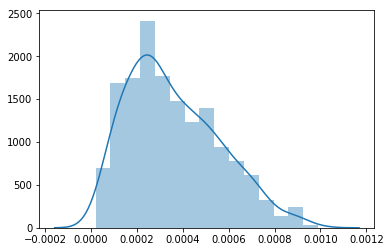

In [369]:
sns.distplot(x_attention_sigmoids_only_loss_b_500_steps)

In [387]:
attention_scores = torch.randn(577)

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


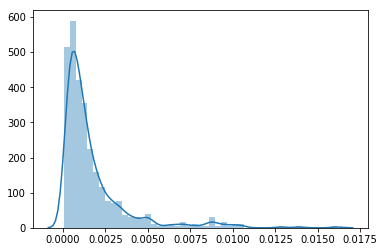

In [389]:
attention_probs = F.softmax(attention_scores)
sns.distplot(attention_probs)

In [390]:
mul = x_attention_sigmoids_only_loss_b_500_steps * a
mul = mul / sum(mul)

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


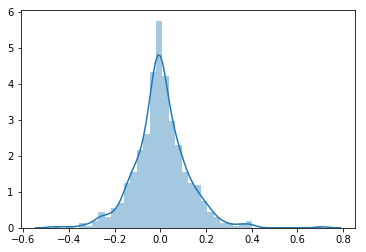

In [391]:
sns.distplot(mul)

In [424]:
both_losses_without_norm_step_130_pred_correct_class_prob_0_983 = torch.tensor([7.3700e-02, 6.2074e-04, 2.8882e-03, 2.6508e-03, 1.2256e-03, 2.8753e-03,
        1.9645e-01, 1.3565e-01, 1.5358e-02, 2.2553e-02, 1.3111e-01, 8.8943e-02,
        9.3946e-02, 6.6460e-02, 1.6188e-01, 2.0375e-01, 2.6923e-01, 6.9874e-02,
        7.9372e-02, 1.1976e-01, 1.5552e-02, 9.6747e-04, 4.7370e-03, 2.4650e-03,
        8.0131e-04, 5.0877e-03, 1.6813e-01, 1.8956e-03, 6.9198e-03, 4.0153e-03,
        4.6405e-01, 1.4871e-03, 2.2338e-03, 2.1131e-03, 8.6504e-03, 3.9072e-03,
        5.2454e-03, 1.3305e-01, 2.3517e-01, 2.0522e-01, 1.7925e-01, 7.9011e-03,
        2.4081e-03, 6.5357e-02, 4.7829e-03, 1.1216e-03, 1.1932e-01, 3.4300e-03,
        2.1003e-02, 5.7666e-03, 2.0621e-01, 4.5489e-03, 7.6608e-03, 7.1087e-04,
        8.2971e-02, 2.4888e-01, 4.2947e-02, 2.2784e-02, 7.3881e-02, 1.9576e-01,
        2.0100e-01, 2.5570e-01, 3.1966e-01, 2.0531e-01, 1.1445e-01, 2.9923e-02,
        1.8590e-01, 1.6026e-01, 1.2859e-01, 8.3147e-03, 2.6851e-03, 1.3842e-02,
        3.4494e-03, 9.3238e-03, 5.5914e-03, 8.9616e-03, 3.3274e-03, 3.6352e-03,
        2.5516e-03, 1.3493e-02, 1.8368e-01, 1.8331e-01, 9.0886e-02, 3.2851e-03,
        2.4657e-01, 2.9824e-01, 1.3639e-01, 1.3169e-01, 4.7667e-02, 1.4553e-02,
        6.1734e-02, 1.3256e-01, 1.6875e-01, 8.9507e-02, 5.2128e-02, 1.6718e-02,
        2.4162e-02, 2.2070e-03, 5.2511e-03, 2.2042e-03, 3.7947e-03, 1.6557e-01,
        1.0129e-01, 1.0450e-01, 2.0652e-01, 1.4829e-01, 2.0399e-01, 1.2359e-01,
        3.3700e-02, 4.4172e-02, 1.7333e-01, 1.4378e-02, 3.7199e-02, 5.8998e-01,
        1.4818e-02, 3.5181e-02, 1.3961e-01, 1.5498e-01, 3.8249e-03, 7.6446e-04,
        9.0202e-03, 4.2470e-03, 7.2241e-03, 7.6565e-03, 2.1482e-01, 2.0048e-01,
        1.0634e-01, 2.6231e-01, 1.2334e-01, 2.1164e-01, 9.1512e-02, 2.6034e-01,
        1.1811e-01, 6.3289e-03, 4.5709e-02, 1.3322e-01, 3.2163e-01, 1.3953e-01,
        1.6438e-01, 3.4651e-02, 5.6009e-03, 6.4251e-03, 1.0387e-01, 1.2392e-02,
        4.4576e-01, 3.7855e-03, 4.0999e-02, 2.3475e-03, 3.1209e-03, 6.0157e-02,
        1.2482e-01, 2.0406e-01, 2.8935e-01, 4.7044e-01, 3.4223e-03, 5.3691e-01,
        9.1956e-02, 6.2919e-01, 7.4319e-02, 7.5893e-04, 2.3597e-01, 3.6024e-03,
        4.8491e-01, 3.9009e-01, 1.4245e-01, 1.8612e-03, 5.0709e-03, 1.7946e-01,
        4.7230e-03, 2.7065e-03, 3.2720e-03, 1.9046e-01, 6.3531e-01, 1.4620e-03,
        2.4249e-03, 2.2421e-02, 5.3339e-03, 6.0019e-02, 7.6004e-01, 7.6161e-01,
        8.1235e-01, 7.9022e-01, 1.6508e-01, 4.2513e-01, 9.0886e-01, 2.1713e-02,
        4.9490e-01, 3.3758e-01, 8.9140e-01, 9.3541e-01, 5.7000e-03, 5.0262e-03,
        2.3726e-01, 5.8086e-03, 3.9175e-03, 4.1946e-03, 1.0702e-02, 5.6208e-03,
        8.3978e-03, 2.1041e-02, 4.9570e-01, 8.5798e-01, 8.4200e-01, 7.5706e-01,
        6.7448e-01, 1.1603e-03, 3.4622e-03, 1.4690e-02, 6.3826e-01, 4.8568e-01,
        7.8843e-03, 4.3355e-02, 5.9062e-01, 1.4730e-01, 2.9904e-01, 1.7150e-03,
        1.6847e-03, 4.1979e-03, 1.0101e-02, 1.0353e-02, 9.7639e-02, 5.4662e-02,
        4.7439e-03, 8.3876e-01, 3.1414e-01, 8.6724e-01, 8.2547e-01, 3.0615e-01,
        2.4836e-03, 8.1375e-01, 5.7128e-01, 2.7652e-02, 3.2326e-03, 7.7441e-01,
        2.5574e-03, 1.8298e-03, 7.5622e-03, 6.6010e-04, 5.7920e-04, 3.4288e-01,
        1.6397e-03, 4.9881e-03, 2.4719e-02, 5.9770e-02, 1.2555e-01, 1.2262e-03,
        1.3585e-03, 9.7918e-03, 6.6990e-01, 7.9999e-01, 7.0298e-01, 5.4978e-01,
        1.6742e-02, 6.6364e-01, 2.5056e-01, 2.5316e-01, 3.6922e-03, 3.4363e-03,
        8.9077e-03, 5.3650e-03, 7.1478e-04, 2.2981e-03, 7.0884e-02, 1.3802e-01,
        2.1629e-01, 5.2892e-03, 1.4259e-02, 7.7727e-02, 1.4967e-02, 2.9129e-04,
        9.1063e-01, 2.2086e-03, 3.8695e-03, 1.9821e-03, 1.4938e-02, 7.1042e-03,
        1.7400e-01, 3.7676e-03, 2.4444e-01, 4.3100e-01, 3.1159e-03, 7.5165e-03,
        5.4180e-02, 4.0162e-03, 2.9932e-01, 6.8260e-02, 1.7159e-03, 4.0320e-02,
        4.0257e-03, 3.9370e-03, 3.6634e-03, 3.1989e-03, 5.1982e-02, 3.4304e-03,
        3.3208e-04, 5.8683e-01, 4.6793e-01, 3.2169e-03, 8.9706e-03, 1.8683e-01,
        1.3302e-02, 9.6318e-03, 1.2627e-02, 3.4244e-02, 2.4965e-03, 1.0433e-01,
        1.9564e-01, 3.8461e-01, 2.7409e-03, 9.6914e-02, 4.6338e-03, 1.1250e-01,
        3.2245e-03, 5.0472e-01, 3.6627e-03, 4.0778e-01, 7.2511e-03, 1.2642e-03,
        1.1323e-02, 3.8977e-03, 2.1503e-03, 1.8290e-03, 5.0874e-03, 3.5724e-03,
        2.9155e-03, 4.7504e-01, 1.8102e-01, 1.7223e-02, 1.4686e-02, 4.7569e-03,
        2.1467e-03, 5.2923e-03, 1.0117e-02, 4.3159e-03, 1.9238e-01, 1.2339e-03,
        1.1204e-02, 1.2460e-02, 3.1042e-01, 6.9891e-03, 4.3866e-03, 6.6991e-03,
        8.4033e-04, 9.6433e-03, 7.3251e-04, 2.7594e-03, 2.0644e-03, 1.1323e-03,
        2.3674e-02, 2.4609e-03, 2.2411e-03, 5.7503e-03, 1.0819e-01, 4.9439e-02,
        7.7462e-03, 1.2587e-02, 4.1215e-03, 2.8967e-02, 1.0520e-02, 1.8652e-03,
        8.4885e-03, 4.3246e-01, 6.1998e-03, 7.1280e-03, 4.3943e-03, 1.2659e-03,
        1.9451e-01, 6.2395e-03, 4.1880e-03, 1.6688e-03, 2.4204e-03, 3.1175e-03,
        3.2632e-02, 1.6875e-03, 6.5908e-03, 2.3802e-03, 4.2266e-03, 4.2882e-03,
        4.5570e-02, 1.3349e-02, 3.8584e-01, 2.2620e-01, 5.7211e-02, 2.6960e-03,
        2.5195e-03, 4.9021e-03, 2.1592e-03, 1.5983e-03, 1.2478e-03, 2.7710e-03,
        1.1484e-01, 2.1411e-03, 2.1516e-04, 1.1538e-01, 6.0250e-02, 9.2747e-02,
        4.6321e-03, 3.8785e-03, 3.7939e-03, 4.1368e-01, 2.7107e-03, 1.3261e-03,
        1.8483e-02, 4.9662e-03, 4.7932e-03, 7.8053e-03, 4.5185e-03, 4.0198e-01,
        2.6372e-02, 1.2293e-03, 1.5690e-03, 3.2928e-03, 2.1389e-01, 1.0620e-01,
        1.6166e-03, 8.0636e-02, 1.2714e-01, 2.7302e-01, 1.8346e-02, 6.3606e-02,
        1.3823e-01, 2.0216e-03, 5.8092e-02, 8.1977e-03, 2.1097e-03, 1.9109e-01,
        2.0761e-03, 3.9240e-03, 5.3706e-04, 5.0221e-02, 5.2242e-03, 3.0056e-03,
        3.5115e-03, 2.1759e-03, 3.3162e-03, 1.1270e-01, 1.6453e-01, 3.1242e-03,
        2.1196e-03, 3.5227e-03, 2.5719e-01, 1.6963e-03, 3.8434e-03, 2.4202e-01,
        5.8717e-02, 1.1284e-02, 2.7954e-03, 1.5683e-03, 6.4879e-03, 1.8456e-01,
        3.8830e-01, 8.1780e-02, 4.0102e-03, 1.6188e-03, 9.5955e-04, 3.1612e-01,
        4.5858e-03, 4.7986e-03, 3.0075e-03, 5.1005e-03, 1.1034e-02, 1.4254e-02,
        3.0896e-03, 2.0234e-03, 1.4882e-03, 8.8811e-03, 4.6860e-03, 1.0432e-02,
        3.0861e-03, 2.3064e-03, 7.9720e-04, 2.7166e-03, 3.6262e-03, 4.3940e-03,
        7.7686e-02, 6.6567e-04, 2.6499e-03, 1.6678e-03, 5.0947e-03, 5.3142e-03,
        1.9454e-03, 7.9074e-04, 6.5963e-03, 6.3698e-03, 2.7720e-03, 2.5638e-03,
        3.1897e-03, 1.4906e-01, 7.5729e-03, 2.9164e-02, 3.4972e-03, 3.8564e-03,
        1.7133e-03, 1.4504e-01, 2.5531e-03, 7.2309e-02, 4.2608e-02, 4.3622e-02,
        3.1209e-03, 1.3701e-03, 1.0322e-02, 4.0427e-02, 3.2017e-03, 1.1382e-03,
        1.1996e-03, 3.0562e-03, 7.2367e-03, 2.0009e-03, 4.2984e-04, 8.8730e-04,
        1.4383e-03, 8.6278e-03, 7.5601e-02, 2.8484e-03, 1.7375e-03, 4.4146e-02,
        1.9687e-01, 2.3022e-01, 2.4292e-01, 3.7177e-03, 1.1881e-03, 5.4619e-03,
        2.6493e-03, 5.2970e-02, 3.7647e-03, 1.8445e-03, 1.5338e-01, 1.5622e-02,
        2.0414e-03, 2.9453e-03, 3.2970e-03, 4.5329e-03, 7.8739e-03, 2.4810e-02,
        2.1533e-03, 2.0919e-04, 4.2053e-03, 2.5718e-03, 7.7650e-03, 1.1667e-01,
        2.3322e-01, 1.0078e-01, 1.3281e-01, 1.2511e-03, 4.3714e-02, 2.3773e-02,
        3.1878e-02, 2.8939e-03, 8.4668e-03, 4.1815e-03, 1.0292e-02, 3.5748e-01,
        3.9642e-01, 2.3706e-03, 3.1872e-03, 7.7277e-03, 2.4263e-03, 2.6982e-03,
        2.1918e-03, 5.5694e-03, 4.0898e-03, 3.3652e-02, 8.6566e-03, 3.9178e-02,
        2.2091e-02, 1.3530e-03, 3.6005e-03, 9.4144e-03, 5.3091e-03, 2.9408e-03,
        9.7302e-04, 4.3610e-03, 8.9978e-03, 3.4069e-01, 6.0022e-03, 4.2802e-01,
        6.3224e-03])

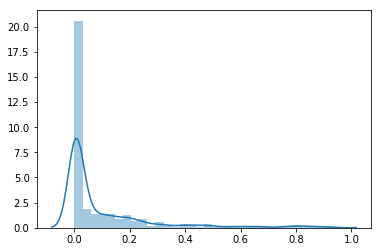

In [426]:
_ = sns.distplot(both_losses_without_norm_step_130_pred_correct_class_prob_0_983)

In [432]:
print(f'sigmoids bigger than 0.5: {len(torch.where(both_losses_without_norm_step_130_pred_correct_class_prob_0_983 > 0.5)[0])}, sigmoids bigger than 0.8: {len(torch.where(both_losses_without_norm_step_130_pred_correct_class_prob_0_983 > 0.8)[0])}')
print('losses: a(preds): 5.926652908325195, b(darkness): 0.15159834921360016')

sigmoids bigger than 0.5: 31, sigmoids bigger than 0.8: 11
losses: a(preds): 5.926652908325195, b(darkness): 0.15159834921360016


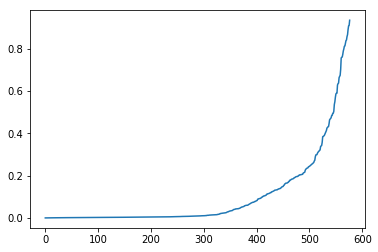

In [446]:
plot_sorted_vector(both_losses_without_norm_step_130_pred_correct_class_prob_0_983)

In [588]:
a = tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0383, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.3591, 0.0000, 0.0000, 0.1794, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.1419, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000])

In [592]:
a[torch.where(a)[0]]

tensor([0.0383, 0.3591, 0.1794, 0.1419])

In [591]:
torch.where(a)[0]

tensor([246, 282, 285, 299])

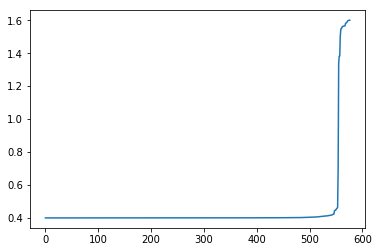

In [586]:
plot_sorted_vector(test)

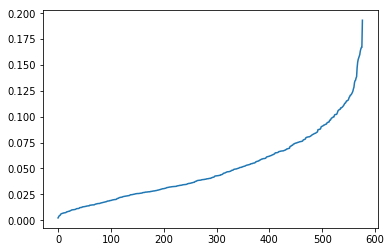

In [319]:
import matplotlib.pyplot as plt
plt.plot(sorted(sigmoid((sea_snake_x_attention_after_200_steps))))
plt.show()

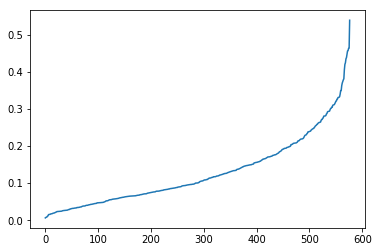

In [303]:
import matplotlib.pyplot as plt
plt.plot(y)
plt.show()

In [504]:
attentions = sigmoid(sea_snake_x_attention_after_100_steps).unsqueeze(0)

In [513]:
attentions.shape

torch.Size([1, 577])

In [516]:
attentions[:, 1:].shape

torch.Size([1, 576])

In [583]:
def plot_scores(scores: torch.Tensor, file_name:str, image_size: int = 384, patch_size: int = 16):
    num_patches = (image_size // patch_size) * (image_size // patch_size)

    if len(scores.shape) == 1:
        scores = scores.unsqueeze(0)
    if scores.shape[-1] == num_patches + 1:
        scores = scores[:, 1:]
        
    w_featmap, h_featmap = image_size // patch_size, image_size // patch_size
    scores = scores.reshape(1, w_featmap, h_featmap)
    scores = nn.functional.interpolate(scores.unsqueeze(0), scale_factor=patch_size, mode="nearest")[0].cpu().detach().numpy()
    plt.imsave(fname=f'plots/{file_name}.png', arr=scores[0], format='png')
    return scores[0]

# plot_scores(both_losses_without_norm_step_130_pred_correct_class_prob_0_983, file_name='both_losses_without_norm_step_130_pred_correct_class_prob_0_983')

array([[0.00062074, 0.00062074, 0.00062074, ..., 0.00080131, 0.00080131,
        0.00080131],
       [0.00062074, 0.00062074, 0.00062074, ..., 0.00080131, 0.00080131,
        0.00080131],
       [0.00062074, 0.00062074, 0.00062074, ..., 0.00080131, 0.00080131,
        0.00080131],
       ...,
       [0.0023706 , 0.0023706 , 0.0023706 , ..., 0.0063224 , 0.0063224 ,
        0.0063224 ],
       [0.0023706 , 0.0023706 , 0.0023706 , ..., 0.0063224 , 0.0063224 ,
        0.0063224 ],
       [0.0023706 , 0.0023706 , 0.0023706 , ..., 0.0063224 , 0.0063224 ,
        0.0063224 ]], dtype=float32)

In [5]:
import torch
from torch.nn import functional
temp = torch.tensor(0.3)
functional.softmax(torch.tensor([5.5, 4.]) / temp)

In [27]:
a = torch.tensor([1/])

In [28]:
entropy(a)

tensor(190.6137)

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor([0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0017, 0.0017, 0.0017, 0.0017, 

In [37]:
entropy(torch.nn.functional.softmax(torch.tensor([1.0] * 577)))

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor(9.1724)

In [172]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

def sample_gumbel(shape, eps=1e-20):
    U = torch.rand(shape)#.cuda()
    return -Variable(torch.log(-torch.log(U + eps) + eps))

def gumbel_softmax_sample(logits, temperature):
    y = logits + sample_gumbel(logits.size())
    return F.softmax(y / temperature, dim=-1)

def gumbel_softmax(logits, temperature):
    """
    input: [*, n_class]
    return: [*, n_class] an one-hot vector
    """
    y = gumbel_softmax_sample(logits, temperature)
    shape = y.size()
    _, ind = y.max(dim=-1)
    y_hard = torch.zeros_like(y).view(-1, shape[-1])
    y_hard.scatter_(1, ind.view(-1, 1), 1)
    y_hard = y_hard.view(*shape)
    return (y_hard - y).detach() + y

In [113]:
import math
num_patches = 566
x_attention = nn.Parameter(torch.randn(num_patches + 1, requires_grad=True)) # [n_patches + 1 for [CLS]]
print(x_attention.shape)

torch.Size([567])


In [291]:
torch.nn.functional

<function torch.nn.functional.sigmoid(input)>

In [461]:
x_attention = torch.tensor([ -5.4671, -6.0720, -5.7175, -5.7373, -6.1329, -5.5311, -5.8201, -6.1118,
        -5.4328, -6.1661, -5.6963, -5.5677, -5.6003, -5.4450, -5.8294, -5.7312,
        -5.8026, -5.4968, -5.6526, -5.4865, -5.5709, -6.2046, -5.4778, -5.5940,
        -6.5862, -5.6718, -5.5329, -5.6670, -1.7739, -1.9237,  0.0940, -5.7935,
        -5.5981, -5.6863, -4.8582, -5.5136, -5.4700, -5.5009, -6.3757, -5.5109,
        -5.5016, -5.4443, -5.8073, -5.8118, -5.4639, -6.2740, -6.0518, -5.5726,
        -5.6294, -4.4494,  1.7619,  1.0785, -5.4465, -6.5818, -5.4923, -5.9780,
        -5.4784, -5.4546, -5.5825, -5.4862, -5.6659, -5.4602, -5.4446, -5.7206,
        -5.4747, -5.4651, -5.7796, -5.4690, -5.9260, -5.5710, -5.6306, -5.4377,
        -5.8516, -1.3537,  0.3081, -4.7438, -5.6304, -5.4780, -6.0013, -5.4555,
        -6.5436, -6.4907, -5.5506, -5.5757, -5.5200, -5.4899, -6.0461, -5.7451,
        -5.7327, -5.7160, -5.9200, -5.4732, -6.3243, -5.5291, -5.5922, -5.4899,
        -6.6089, -6.0118, -5.4894, -5.7006, -6.0983, -5.5290, -5.6757, -5.4479,
        -5.5425, -6.0873, -5.7774, -6.1385, -5.4289, -5.6105, -6.1550, -5.4480,
        -5.4411, -5.8604, -5.5067, -5.4235, -5.4975, -5.5139, -5.5344, -6.6890,
        -3.4882, -5.6755, -5.5483, -6.7544, -5.6859, -5.4451, -6.4797, -5.5061,
        -6.5750, -5.7147, -5.4535, -5.8634, -5.4648, -5.4510, -5.8431, -5.4683,
        -5.7872, -5.6321, -5.6782, -5.4649, -5.6130, -6.3731, -5.5072, -5.4385,
        -5.9083, -5.6756, -5.7254, -5.8227, -5.5249, -5.5771, -5.5493, -5.6586,
        -5.7232, -5.7254, -7.3723, -5.6881, -5.4493, -5.9453, -5.7489,  0.5480,
        -5.2875, -5.5021, -5.4459, -5.4428, -5.5225, -6.8258, -5.4703, -5.4968,
        -5.4712, -5.5454, -5.7855, -5.4762,  0.7916, -6.6433, -5.6888, -5.4437,
        -5.6198, -0.2843, -6.0692,  2.1369, -1.3826,  1.8907, -1.4179, -2.4031,
         0.9984, -3.3398,  0.0170,  1.0362, -0.1418, -6.0646, -0.4594, -5.7011,
        -6.0814, -5.8326, -5.9532, -5.6394, -5.4479, -5.4429, -5.4722, -2.8739,
        -1.2279, -0.3293,  4.6302,  0.7884, -1.7035, -6.9061,  2.7796, -4.3366,
        -2.7137, -5.0155, -0.6512, -3.6446, -7.0621, -0.2859,  0.4838, -5.7564,
        -6.0495, -5.4634, -5.9504, -5.5648, -6.7267, -5.4450,  3.9787, -0.2452,
         2.0647, -5.0115, -6.6116, -4.1689, -1.1429,  3.5462, -6.6868, -5.8872,
        -5.6222,  2.4649, -2.8354, -2.7652, -5.5532, -6.8666, -6.8787, -5.7526,
        -6.2778, -5.4706, -5.5535, -5.8973, -5.5448, -5.8888, -1.5923,  3.5169,
        -5.8898, -3.8442, -2.0510, -4.3422, -2.4836, -5.5097, -1.1175,  1.2499,
        -6.0805, -5.5027,  2.5628, -5.5194, -6.1549, -5.7637, -5.5499, -6.1753,
        -5.4559, -5.4300, -5.4333, -5.4605, -5.4540, -6.1446, -5.7864, -4.0143,
         2.9943, -6.2651, -5.5058, -5.6980, -5.4373, -5.7283, -6.8313, -4.5029,
        -5.7736,  1.6640,  0.8967, -5.5494, -6.2705, -5.6937, -5.5708, -5.8811,
        -5.4479, -5.4596, -5.5834, -5.4379, -5.4420, -5.6918, -0.0425, -0.7562,
        -0.2939, -6.1528, -5.3950, -5.6648, -5.5873, -5.4627, -5.4457, -2.4786,
        -5.7291, -5.4649, -5.5098, -3.1902, -5.7418, -6.0575, -5.4439, -5.9401,
        -5.5275, -5.9322, -5.7388, -5.8281, -5.5216, -6.1248, -5.6167, -5.8436,
        -5.7668, -5.8551, -5.6652, -5.7129, -6.3253, -5.7275, -6.1219,  1.5536,
        -5.3893, -5.8525, -5.8017, -5.5949, -6.0711, -5.8823, -5.6546, -6.7775,
        -2.0408, -5.4866, -5.4746, -5.4906, -5.6421, -5.6220, -6.2298, -5.4379,
        -6.9393, -5.5606, -5.7318, -6.3506, -5.7501, -5.9450, -5.8855, -5.7061,
        -5.9483, -5.4536, -3.7346,  1.9845, -5.6140, -5.4085, -5.3522, -5.6706,
        -5.4790, -6.4348, -6.2806, -6.0822, -5.5012, -6.5142, -7.0047, -5.5763,
        -5.4980, -6.2188, -6.3407, -5.5139, -5.4765, -5.8677, -5.4395, -5.6065,
        -5.4395, -5.4666, -5.4700, -0.8154, -5.5940, -5.9655, -4.2411, -6.0512,
         0.4037, -5.4660, -5.6587, -6.4083, -5.9107, -5.7533, -5.9134, -5.6260,
        -7.9362, -5.5035, -5.7687, -5.4882, -5.4303, -5.5761, -5.6588, -3.1342,
        -5.5976, -6.3170, -5.8323, -5.4438, -5.4974, -5.4527, -5.4435, -5.5437,
        -0.3477, -6.5720, -6.0767, -5.4972, -5.6681, -5.6118, -5.6667, -5.9817,
        -5.6074, -5.6648, -6.5817, -5.4476, -5.8371, -5.5654, -0.3496, -0.5145,
        -6.0273,  1.9280, -5.6452, -5.5021, -6.7492, -5.5092, -5.4613, -5.8267,
        -5.5207, -5.6992, -5.8043, -5.4480, -5.6688, -5.6562, -6.9308, -5.5606,
        -5.8143, -5.8169, -5.9080, -5.4520, -6.4136, -5.5187, -5.5051, -6.4886,
        -5.4951, -5.7422, -6.1940, -5.4524, -6.0141, -5.9523, -6.2701, -5.6396,
        -5.9046, -5.4316, -5.4732, -5.5371, -6.3559, -5.4482, -5.5930, -5.6501,
        -6.1899, -5.4460, -5.4548, -5.4384, -5.8663, -5.6324, -6.1563, -5.4782,
        -5.4605, -5.5301, -5.8998, -6.5650, -5.9488, -5.6746, -5.4958, -5.5242,
        -6.2082, -6.3251, -5.4434, -5.4748, -5.8043, -5.9170, -5.5412, -5.7849,
        -5.4656, -5.5911, -5.5498, -5.5729, -6.3587, -5.6279, -5.7685, -6.3299,
        -5.8412, -6.2606, -5.5022, -5.7611, -5.4190, -5.7703, -5.5619, -5.9655,
        -5.7543, -6.1516, -5.7115, -6.3753, -7.2818, -6.2365, -6.2797, -5.6033,
        -5.8454, -5.7228, -5.8895, -5.7891, -5.5549, -5.9306, -6.2168, -5.4548,
        -5.9557, -5.9816, -5.7924, -7.2184, -5.8171, -5.8330, -6.2675, -5.4844,
        -5.8998, -5.5461, -5.7941, -5.4813, -5.5796, -5.5661, -6.0448, -7.6382,
        -5.9910, -6.4858, -5.4681, -5.5774, -5.7224, -5.4596, -6.6400, -5.8816,
        -6.0615, -6.3200, -5.8552, -5.7534, -5.4651, -5.8727, -5.5962, -6.4029,
        -1.9257, -5.7637, -6.1020, -5.5262, -5.8537, -5.6200, -5.7836, -5.4496,
        -5.4443, -5.4943, -6.6993, -5.5255, -5.7488, -6.2006, -5.5832, -5.4339,
        -5.4361, -5.4862, -6.0937, -5.8823, -5.4170,  0.1402,  0.5032, -5.5674,
         0.4213])

In [466]:
log_prob_x_attention = torch.stack((torch.log(1 - F.sigmoid(x_attention)),torch.log(F.sigmoid(x_attention)),)).T
temperature = 0.8
log_probs = [gumbel_softmax(log_prob, temperature=temperature) for log_prob in log_prob_x_attention]
sampled_binary_patches = torch.stack(log_probs).mm(torch.tensor([[0., 1.]]).T).T[0]

# t = []
# for lb in log_probs:
#     t.append(torch.where(lb)[0])
#     tt = torch.stack(t).T[0].float()

In [467]:
sampled_binary_patches

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 

In [447]:
torch.equal(torch.sigmoid(x_attention), F.sigmoid(x_attention))

True

In [444]:
x_attention[:10]

tensor([ 5.4671, -6.0720, -5.7175, -5.7373, -6.1329, -5.5311, -5.8201, -6.1118,
        -5.4328, -6.1661])

In [443]:
torch.stack((1 - F.sigmoid(x_attention)[:10], F.sigmoid(x_attention)[:10])).T

tensor([[0.0042, 0.9958],
        [0.9977, 0.0023],
        [0.9967, 0.0033],
        [0.9968, 0.0032],
        [0.9978, 0.0022],
        [0.9961, 0.0039],
        [0.9970, 0.0030],
        [0.9978, 0.0022],
        [0.9956, 0.0044],
        [0.9979, 0.0021]])

In [442]:
sampled_binary_patches

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 0., 0., 0., 0., 1., 1., 

In [316]:
torch.equal(tt, sampled_binary_patches)

True

In [339]:
%%time
def calculate_sampled_distribution_gumble_softmax(x_attention) -> torch.Tensor:
    """
    :return binary tensor of sampled by gumble-softmax with size of [n_patches + 1] # 1 for [CLS] token
    """
    sigmoid_x_attention = torch.nn.functional.sigmoid(x_attention)
    log_prob_x_attention = torch.stack((torch.log(sigmoid_x_attention), torch.tensor(torch.log(1 - sigmoid_x_attention)))).T
    log_probs = [gumbel_softmax(log_prob, temperature=0.8) for log_prob in log_prob_x_attention]
    sampled_binary_patches = torch.stack(log_probs).mm(torch.tensor([[0., 1.]]).T).T[0]
    return sampled_binary_patches

calculate_sampled_distribution_gumble_softmax(x_attention).shape

Wall time: 54.8 ms


In [342]:
x_attention = torch.tensor([ 1.6002e+00,  2.8506e-01, -1.6436e-01, -7.1861e-01, -5.5423e-01,
        -8.0912e-01, -1.3710e+00, -7.8603e-02,  3.8328e-01, -1.1732e+00,
        -3.0939e-01, -1.3934e-01, -3.5368e-01, -4.1187e-01, -3.9935e-01,
        -6.2687e-01, -8.0683e-01, -7.6669e-01, -8.9046e-01, -7.3058e-01,
        -1.1574e+00, -3.8883e-01, -1.0450e+00,  3.2977e-02, -1.1225e-01,
         5.3417e-01, -7.9154e-01, -2.4247e+00, -3.4678e-02,  2.2416e-01,
        -4.4738e-01, -3.2097e-02, -1.0817e+00,  1.6891e-01,  4.5492e-01,
         4.1838e-02,  2.1447e+00, -9.1616e-01, -2.5152e-01, -9.6698e-01,
        -8.6238e-01,  3.9107e-01, -4.0204e-01, -8.5065e-01, -8.5396e-01,
        -1.1380e+00,  6.3371e-01, -1.2485e+00, -8.0863e-01,  2.2276e+00,
         2.9775e+00, -1.5942e-01,  1.4935e+00, -1.1667e+00,  1.8038e+00,
        -1.8951e+00, -9.5423e-01, -7.4370e-01, -5.8774e-01, -7.5161e-01,
        -1.2473e+00, -1.0098e+00,  4.4469e+00, -1.2256e+00, -1.0952e+00,
        -4.4171e-01, -7.3101e-01, -7.9702e-01, -6.8323e-01, -6.7471e-02,
        -8.1070e-01,  3.8110e-01,  7.9673e-01,  1.4992e+00, -1.1654e+00,
        -5.8285e-01, -1.4552e+00, -3.9453e-01,  2.9387e-01,  2.2060e+00,
        -6.7219e-01, -1.1468e-01, -1.2265e+00, -3.3382e-01, -1.2320e+00,
        -2.0048e-01, -3.2567e-01,  5.5943e-01, -6.4630e-01, -9.7119e-01,
        -5.6720e-01, -7.6075e-01, -3.6883e-01, -6.7102e-01, -8.3869e-01,
        -7.7916e-01, -6.2006e-01, -1.1121e+00,  3.7005e-01, -2.0935e-01,
        -1.3689e+00,  3.9808e-01, -9.2585e-01, -6.3678e-01, -9.0841e-01,
        -4.2458e-01,  1.3233e-01,  8.2176e-02,  4.8000e+00, -3.1345e-01,
         5.3381e-01,  6.2253e-01,  4.2983e+00, -1.0532e+00, -6.3340e-01,
         5.0279e+00, -1.1670e+00, -5.8534e-01,  4.3157e-01, -1.1487e-01,
         2.3147e+00,  7.9434e-01,  1.1838e+00, -6.4650e-01, -9.7455e-01,
        -5.8327e-01, -1.3341e+00, -9.4112e-01,  1.8231e-01,  3.1711e-03,
        -3.4609e-01, -5.2004e-02,  1.0783e-01,  1.2035e+00,  6.1417e-01,
        -5.8568e-01,  1.2738e-01, -9.6676e-02, -8.2211e-01,  1.1556e+00,
         4.0255e-01, -1.1079e+00,  8.7166e-01,  2.2573e+00, -2.8001e-01,
        -8.4211e-01,  3.1322e-02, -6.0710e-01,  1.7732e-01,  1.5602e-01,
        -7.7657e-01,  1.2518e+00,  1.3949e+00,  5.0373e-01, -1.8862e+00,
         1.4320e+00, -3.6620e-01,  4.9364e-01,  8.6198e-01, -2.7696e-01,
         2.1060e+00, -1.0578e+00,  7.4661e-01,  1.0392e+00, -1.0114e+00,
        -6.9349e-01, -3.6752e-01, -5.5680e-01,  7.8161e-01,  8.8189e-02,
        -1.5913e+00,  9.5146e-01,  8.7716e-01, -1.1075e+00,  1.1029e+00,
         2.4152e+00, -4.9190e-02,  1.4223e+00, -3.4428e-02,  4.7555e-01,
        -7.2361e-01, -1.5374e+00,  1.0671e+00, -2.1628e+00,  1.7398e-01,
        -1.8281e+00,  6.4293e-01, -5.8609e-01,  8.0917e-01, -1.8589e-01,
         5.9691e-01,  1.0903e-01,  4.3155e-01,  7.5150e-01,  6.8673e-01,
        -1.0141e+00, -1.1690e-01,  1.7552e+00,  5.5378e-01,  9.9395e-01,
        -2.2001e+00,  4.8940e-01,  3.8497e+00, -2.0234e+00, -6.1842e-01,
        -1.6004e+00, -4.1733e-01,  7.5516e-01, -1.5367e+00,  7.0125e-01,
         2.7311e+00, -1.8206e+00, -8.8870e-01, -1.6308e+00,  2.0558e+00,
        -1.4243e-01, -2.1417e+00,  1.0984e+00, -3.7069e-01, -1.1928e-01,
        -1.5954e+00,  2.8135e+00,  2.6594e+00,  2.0431e-01, -1.0969e-01,
        -1.9195e+00, -1.7511e+00, -1.1584e+00,  1.4903e+00,  1.8007e+00,
        -3.1453e-01, -5.5599e-01,  1.8911e-02, -4.9663e-01,  3.5111e-01,
         4.2413e-01,  1.0267e-01, -6.7648e-01, -4.5094e-02, -6.5513e-02,
         5.4154e-02,  8.9549e-01, -1.1491e+00, -6.2896e-02, -9.3340e-01,
         7.0998e-01,  5.6432e-01, -4.3412e-01, -5.9972e-01, -1.7392e+00,
        -9.5473e-01,  1.2846e+00,  9.3522e-01,  5.6241e-01,  4.8043e-02,
         1.7648e+00, -2.1323e+00, -1.7387e+00,  1.6833e+00,  1.1652e+00,
         2.2321e-01, -5.5947e-01, -1.1785e+00, -3.1729e-01,  5.5835e-01,
         3.5956e+00,  4.7020e+00,  4.3920e-01,  1.2016e+00,  1.6571e-01,
         6.1153e-01,  3.0226e-01,  7.0363e-01,  2.9648e-01,  4.6349e-01,
         1.0095e+00,  7.0028e-01, -1.4568e+00, -7.8121e-01, -2.9926e-01,
        -1.3464e+00,  2.3334e+00, -5.5944e-01,  8.0477e-01,  3.3390e-01,
        -2.7864e-01, -6.0866e-01, -2.5353e-01,  1.5483e+00,  1.9459e+00,
        -3.6876e-01,  3.8132e+00,  1.7120e+00,  1.2494e+00, -4.0207e-01,
         6.7638e-01,  2.0653e+00,  7.0347e-01,  2.2192e+00, -4.3695e-02,
        -1.3861e-01,  1.0822e+00,  9.8061e-01, -6.1266e-01, -2.5073e-02,
         1.8275e+00,  1.5881e-01,  2.6248e+00,  4.5177e-01, -6.7842e-01,
         4.2413e+00,  7.7466e-01, -1.0104e+00,  9.0415e-01,  1.2475e+00,
        -4.9524e-01, -9.8181e-01, -1.6746e-01, -3.5585e-02,  6.3036e-01,
        -1.8489e+00, -6.5399e-01, -1.1427e+00, -2.5007e-01,  1.3950e-01,
        -3.3638e-01, -9.2540e-01,  3.0166e+00,  5.5861e+00,  5.8128e-01,
        -6.8213e-01, -1.0047e+00, -1.4613e+00,  8.8719e-01,  1.2760e+00,
        -3.3634e-01,  8.0132e-01,  1.3789e+00,  8.1911e-01, -3.9930e-01,
         7.5580e-01, -1.3282e+00, -1.7641e+00,  3.2298e-01, -9.9926e-01,
         1.7963e+00, -9.1625e-01,  3.7314e-01,  6.1314e-01, -4.1812e-01,
        -8.6268e-01,  1.5851e+00, -1.0887e+00,  2.1594e+00, -4.5654e-01,
         7.3705e-01, -2.0975e+00,  3.1730e+00,  2.3600e-01, -9.9696e-01,
         6.3698e-01,  6.3080e-01, -2.7053e+00, -1.1477e+00,  5.4752e-01,
        -1.3923e+00, -8.4105e-01, -3.4393e-01,  7.5972e-01, -2.5403e+00,
        -1.6953e-01, -5.7070e-01, -9.6670e-01, -8.5969e-01,  4.1992e+00,
         6.8897e-01,  4.2520e+00, -5.7376e-01,  9.7600e-02,  1.3615e+00,
        -3.9347e-01, -7.8550e-02,  3.6420e+00, -4.1984e-01, -1.3556e+00,
         5.4282e-01, -6.5340e-01, -1.3391e+00, -7.5348e-01,  1.1631e+00,
        -1.4334e+00, -8.9017e-01, -1.3655e+00, -4.1200e-01, -1.5549e+00,
         7.6350e-01,  4.7784e+00,  8.6040e-01,  4.4580e-01,  1.5273e+00,
        -1.1896e+00, -1.6913e-02, -2.3719e-01,  3.5077e+00, -5.0274e-01,
         2.9599e-02,  3.2237e+00,  6.0648e-01, -8.0070e-01, -1.2602e+00,
        -7.9702e-01, -7.5667e-01, -8.7711e-01, -6.1909e-01, -1.0427e-01,
        -3.6320e-01, -1.1630e+00, -8.6572e-01, -4.8681e-01, -6.3576e-01,
         7.5047e-01,  9.9132e-01,  3.7386e+00,  2.7145e+00, -1.9611e-01,
         4.2856e-01, -1.3309e+00, -8.8904e-01,  1.3177e-01, -9.9465e-01,
         9.0338e-02, -4.3456e-01,  2.6788e-03,  1.2958e+00, -8.1232e-01,
        -4.0785e-01, -1.1508e+00, -1.1637e+00,  4.7360e-02,  1.0546e+00,
        -3.9640e-01, -6.5460e-01, -4.1312e-01,  1.3258e+00, -8.6498e-01,
        -7.1041e-01, -6.3376e-01, -1.9513e+00,  1.6721e-03,  3.6934e-01,
        -1.5387e+00,  1.2652e+00, -1.2490e-01, -8.5870e-01,  4.1863e-02,
         3.4540e-01,  8.9492e-01,  3.7628e+00, -9.9415e-01, -1.1321e+00,
         2.3405e-01,  4.1027e+00,  1.3627e+00, -9.8262e-01, -1.2187e-01,
         2.1364e+00,  3.3119e-01,  2.4972e+00, -9.4251e-01, -9.1162e-01,
         1.0484e-01,  1.4971e-02,  3.7543e-01, -1.0364e-01,  2.6435e-02,
        -4.0519e-01, -1.7079e+00, -1.2641e+00,  1.9648e+00,  2.3957e-01,
        -1.2008e+00, -1.3057e+00,  4.2347e+00,  1.2261e+00, -7.6929e-01,
         2.3868e-01, -8.0356e-01, -7.6353e-01,  6.0799e-01, -8.3529e-02,
         1.0599e+00,  6.5453e-01,  3.0820e-01, -8.0317e-01, -3.3924e-01,
        -1.2801e+00, -4.6006e-01, -2.5281e-01, -9.9786e-01, -8.3612e-01,
         5.0606e+00, -1.0975e+00, -1.0397e+00, -3.9053e-01,  4.9981e-01,
         3.5420e-01, -1.1295e+00, -1.2867e+00, -5.6644e-02, -1.4031e+00,
        -1.2889e+00, -6.0357e-01, -9.1769e-01, -7.4405e-01, -1.3462e+00,
         1.1430e-01, -8.4145e-01, -3.4935e-02, -3.5755e-01,  6.7325e-01,
        -3.1200e-01, -2.5462e-01, -7.7618e-01, -9.7403e-01, -6.0347e-01,
        -8.0117e-01, -1.4344e+00,  9.5301e-02, -1.4331e+00,  5.2553e-01,
        -8.6558e-01,  2.0724e+00,  1.0411e-01, -1.2902e+00,  5.0605e-01,
        -1.6432e+00,  2.5869e-01, -1.5821e-01, -1.0586e+00, -1.1421e+00,
         6.7498e-01, -8.8164e-01,  2.2772e-01, -5.4201e-01, -3.1294e-01,
        -2.1822e-01, -4.4951e-01, -8.6315e-01,  5.5067e-01, -1.4673e+00,
        -8.7360e-01, -2.1132e+00,  9.8345e-01, -1.2315e+00,  1.7375e-01,
        -8.3224e-01, -1.7803e+00, -1.1473e+00,  1.0141e+00,  2.8039e+00,
         2.6257e+00, -9.5688e-01, -8.9609e-01, -3.6749e-01,  2.7048e-01,
         4.1984e-01,  7.2065e-01,  1.6707e+00,  2.4437e+00, -9.4844e-01,
         3.7519e-01,  2.4395e-01,  3.9587e+00, -1.5160e+00, -1.7295e+00,
         1.3611e+00, -7.8830e-01])

In [110]:
sigmoid

Sigmoid()

In [97]:
res = torch.tensor([1.5, 4, -2, 0.5])

In [54]:
max_idx = torch.argmax(F.softmax(res)).item()

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


In [102]:
torch.max(F.softmax(res)) == F.softmax(res)[0][230]

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor(True)

In [56]:
max_idx

230

In [55]:
res[0][max_idx]

tensor(13.2320)

In [71]:
from torch.nn import CrossEntropyLoss, KLDivLoss

In [58]:
loss = CrossEntropyLoss()

In [287]:
rr = torch.tensor([[-0.222, -0.1442, -0.9999, -0.3612, -0.00052342]])
print(torch.argmax(rr))
print(loss(rr, torch.tensor(4).unsqueeze(0)))

tensor(4)
tensor(1.3172)


tensor(0.3223)

In [256]:
res[0][:5]

tensor([-0.3834, -0.1442, -0.8058, -0.3612, -0.0970])

In [63]:
torch.tensor(230).unsqueeze(0)

tensor([230])

In [64]:
torch.tensor(230).unsqueeze(0).shape

torch.Size([1])

In [67]:
one_hot = torch.zeros_like(res)
one_hot[0][230] = 1

In [74]:
res.shape, torch.log(one_hot).shape

(torch.Size([1, 1000]), torch.Size([1, 1000]))

In [86]:
F.softmax(res)[0][230]

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


tensor(0.6458)

# TODO - understand why it happens

* Step 1 - see that the loss decreasing of the bce
* Step 2 - add b to the loss
* Send update in the group

In [123]:
klloss = KLDivLoss()
klloss(log(res), log(one_hot)).item()

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\torch\nn\functional.py:2742: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  "reduction: 'mean' divides the total loss by both the batch size and the support size."


0.0

In [124]:
loss(res, torch.tensor(230).unsqueeze(0))

tensor(0.)

In [126]:
torch.argmax(res).item()

230

In [454]:
-2.8994e-01

-0.28994

In [455]:
 2.4139e+00

2.4139

In [347]:
x = torch.randn(567)

In [349]:
kl_loss = nn.KLDivLoss(reduction='mean')

In [450]:
from scipy import special
special.kl_div(p, q)

tensor([ 2.4624,  2.6045,  7.8046,  6.6859, 10.6411,  2.8380,  4.5476,  4.0420,
        11.7419,  4.0116,  5.7798, 11.6770,  7.2170,  3.3996,  4.8752,  9.2812,
         1.7095,  5.6949,  4.2840, 10.7001,  9.2707,  9.6273, 12.0558,  8.7298,
         5.7205,  7.7988,  1.3827,  4.0557,  7.7105,  4.7872,  6.6870,  7.0775,
        10.3875,  7.2192,  5.2690,  2.5587,  3.2124,  8.8945,  3.9391,  9.8963,
         5.1439,  5.4516,  8.2634,  6.3294, 11.0908,  8.5290,  8.3999,  4.5292,
         5.0397,  3.7642,  3.2067,  4.3889, 10.7758,  6.8045,  9.1940,  8.1012,
         5.4858,  8.4915,  2.5509,  1.6782,  1.9493, 10.7051,  9.0160,  7.5935,
         6.2594,  4.0099,  8.2859,  6.5761,  2.7617,  3.0581,  4.7463, 10.7789,
         2.6632,  7.0069,  4.0150,  9.1673,  5.5070, 10.6440,  7.1765,  7.3620,
         4.3426, 10.3754,  5.8571,  5.9493,  5.1276,  3.2048,  8.1121,  6.6044,
         7.0305,  5.9587,  4.6815, 10.6706,  6.7300,  7.6197,  6.9437,  1.3332,
         5.6494,  5.2836, 10.4081,  7.49

In [417]:
def kl(p, q):
    s = 0
    for i in range(len(p)):
        s += p[i] * torch.log(p[i] / q[i])
    return s / len(p)
        
def kl_divergence(p, q):
    return sum(p[i] * torch.log(p[i]/q[i]) for i in range(len(p))) / len(p)
p = F.sigmoid(x)
q = torch.zeros_like(x) +  1e-6
kl(p,q), kl_divergence(p,q)

(tensor(6.7200), tensor(6.7200))

In [413]:
p[0] * (torch.log(p[0] / torch.tensor(1e-6)))

tensor(2.6804)

In [418]:
x = torch.tensor([ 4.3201, -4.7547, -4.2606, -4.2918, -4.8329, -3.8630, -4.4228, -4.8084,
        -2.9395, -4.8776, -4.2278, -3.9600, -4.0416, -3.2860, -4.4306, -4.2765,
        -4.3917, -3.7216, -4.1485, -3.6717, -3.9730, -4.9257, -3.6357, -4.0282,
        -5.3631, -4.1927, -3.8672, -4.3784, -0.4182, -1.1301, -0.8258, -4.3543,
        -4.0344, -4.2053, -3.6162, -3.8044, -3.5963, -3.7540, -5.1207, -3.8035,
        -3.7552, -3.1910, -4.3999, -4.4072, -3.4821, -5.0023, -4.7370, -3.9828,
        -4.0988, -2.4470,  1.4751, -0.2001, -3.2607, -5.3597, -3.7322, -4.6421,
        -3.6340, -3.4194, -4.0041, -3.6740, -4.1676, -3.5124, -3.1213, -4.2682,
        -3.6376, -3.5221, -4.3626, -3.5633, -4.5719, -3.9663, -4.0986, -3.0589,
        -4.4802, -1.1171, -1.1544, -3.7754, -4.1036, -3.6368, -4.6728, -3.5361,
        -5.3150, -5.2555, -3.9210, -3.9734, -3.8305, -3.6993, -4.7298, -4.3042,
        -4.2828, -4.2538, -4.5597, -3.5685, -5.0591, -3.8434, -4.0179, -3.6983,
        -5.3888, -4.6914, -3.7026, -4.2378, -4.7991, -3.8529, -4.1850, -3.3142,
        -3.8884, -4.7796, -4.3561, -4.8415, -2.8998, -4.0649, -4.8644, -3.3985,
        -3.1886, -4.4783, -3.7706, -2.7420, -3.7308, -3.7834, -3.8754, -5.4772,
         0.1376, -4.1908, -3.9249, -5.5458, -4.2094, -3.3134, -5.2462, -3.7766,
        -5.3497, -4.2543, -3.4364, -4.4769, -3.4830, -3.3776, -4.4626, -3.5617,
        -4.3773, -4.0985, -4.1867, -3.5614, -4.0740, -5.1268, -3.7901, -3.1647,
        -4.4294, -4.1859, -4.2766, -4.4286, -3.8466, -3.9851, -3.9264, -4.1569,
        -4.2744, -4.2800, -6.2002, -4.2244, -3.4442, -4.6580, -4.3215,  0.3611,
        -3.3995, -3.7967, -3.3044, -3.1671, -3.8322, -5.6320, -3.5669, -3.7307,
        -3.6190, -3.9039, -4.3679, -3.5586,  0.5201, -5.4280, -4.2269, -3.2584,
        -4.1260, -0.4953, -4.7221,  2.1276, -0.6610,  1.6699,  2.1610, -1.5397,
         0.5948, -3.0905,  0.0951, -0.5175,  0.0753, -4.6178,  1.2262, -4.1253,
        -4.7764, -4.4429, -4.5993, -4.1217, -3.2676, -3.2717, -3.5376, -1.5539,
        -1.5702, -0.2855,  3.9536,  0.6514, -1.3165, -5.7060,  2.2660, -2.4130,
        -2.2800, -3.5624,  0.0996, -4.9098, -5.8534,  0.0241, -0.2784, -4.3279,
        -4.7363, -3.5069, -4.6027, -3.9567, -5.5564, -3.3744,  3.6139,  0.3460,
         1.5628, -3.5562, -5.3707, -3.4182, -1.0152,  3.0368, -5.4757, -4.5078,
        -4.1297,  2.2582, -2.0834, -2.5969, -3.9203, -5.6742, -5.6803, -4.3239,
        -5.0157, -3.5930, -3.9360, -4.5336, -3.9018, -4.5208, -0.0730,  2.6673,
        -4.5210, -3.2313, -1.1099, -3.0212, -1.7164, -3.7591, -0.8828,  0.9578,
        -4.6236, -4.1586,  2.3124, -3.7241, -4.8627, -4.3396, -3.9171, -4.8887,
        -3.4011, -2.9449, -2.9667, -3.4813, -3.3724, -4.8413, -4.3501, -3.4056,
         2.7767, -4.9961, -3.7412, -4.2511, -3.0347, -4.2931, -5.6384, -3.9359,
        -4.3350,  1.1659,  1.0625, -3.9106, -5.0065, -4.2257, -3.9758, -4.5099,
        -3.3442, -3.4445, -4.0031, -3.1570, -3.2265, -4.1919, -0.4350, -0.5685,
        -0.1722, -4.8582, -3.8037, -4.1789, -4.0247, -3.5112, -3.3497, -2.2063,
        -4.2803, -3.6561, -3.7780, -2.1578, -4.3040, -4.7446, -3.2377, -4.5926,
        -3.8542, -4.5854, -4.3030, -4.4401, -3.8366, -4.8299, -4.0615, -4.4637,
        -4.3359, -4.4732, -4.1728, -4.2576, -5.0659, -4.3356, -4.8243,  0.5049,
        -2.2722, -4.4722, -4.3933, -4.0291, -4.5768, -4.5130, -4.1626, -5.5714,
        -1.6097, -3.6633, -3.6151, -3.7120, -4.1288, -4.0890, -4.9540, -3.1019,
        -5.7563, -3.9456, -4.2926, -5.0990, -4.3184, -4.5978, -4.5170, -4.2491,
        -4.6035, -3.4217, -2.4834,  1.8288, -3.9846, -2.5732, -2.9325, -4.1862,
        -3.6061, -5.1894, -5.0155, -4.7793, -3.7533, -5.2816, -5.8106, -3.9878,
        -3.7333, -4.9408, -5.0884, -3.7999, -3.6287, -4.4916, -3.2097, -4.0518,
        -3.1037, -3.5686, -3.5936,  0.5814, -3.8872, -4.5428, -0.4145, -4.7368,
         0.1133, -3.5583, -4.1631, -5.1681, -4.5540, -4.3199, -4.5555, -4.0913,
        -6.7772, -3.7368, -4.3442, -3.7008, -2.9145, -3.9846, -4.1559, -1.8495,
        -4.0367, -5.0561, -4.4403, -3.2197, -3.7297, -3.4255, -3.1993, -4.0832,
        -0.1921, -5.3424, -4.7682, -3.7065, -4.1730, -4.0721, -4.1725, -4.6432,
        -4.0551, -4.1690, -5.3480, -3.3134, -4.4550, -3.9769,  0.7020, -0.2513,
        -4.7113,  2.0882, -4.1346, -3.7511, -5.5420, -3.7877, -3.5184, -4.4351,
        -3.8307, -4.2378, -4.4019, -3.3561, -4.1795, -4.1484, -5.7392, -3.9441,
        -4.2971, -4.4153, -4.5484, -3.4065, -5.1733, -3.8152, -3.7838, -5.2538,
        -3.7234, -4.2931, -4.9006, -3.4208, -4.6875, -4.6085, -5.0005, -4.1256,
        -4.5419, -3.0846, -3.6230, -3.8714, -5.0923, -3.2626, -4.0168, -4.1456,
        -4.9061, -3.2419, -3.5329, -3.1259, -4.4878, -4.1119, -4.8676, -3.6205,
        -3.4775, -3.8684, -4.5352, -5.3361, -4.6042, -4.1894, -3.7326, -3.8387,
        -4.9276, -5.0604, -3.1615, -3.6144, -4.4079, -4.5596, -3.9032, -4.3730,
        -3.5631, -4.0222, -3.9160, -3.9713, -5.1090, -4.0994, -4.3483, -5.0750,
        -4.4554, -4.9901, -3.7657, -4.3353, -2.6901, -4.3471, -3.9440, -4.6239,
        -4.3109, -4.8749, -4.2488, -5.1189, -6.1084, -4.9646, -5.0156, -4.0483,
        -4.4651, -4.2751, -4.5235, -4.3772, -3.9329, -4.5822, -4.9399, -3.4400,
        -4.6104, -4.6542, -4.3802, -6.0451, -4.4198, -4.4454, -5.0005, -3.6641,
        -4.5447, -3.8951, -4.3828, -3.6276, -4.0019, -3.9569, -4.7333, -6.4787,
        -4.6591, -5.2489, -3.5734, -3.9922, -4.2753, -3.4769, -5.4196, -4.5176,
        -4.7547, -5.0600, -4.4841, -4.3225, -3.5259, -4.4752, -4.0267, -5.1673,
        -0.4816, -4.3252, -4.7954, -3.8102, -4.4774, -4.0897, -4.3677, -3.3969,
        -3.3411, -3.7249, -5.4859, -3.8367, -4.3096, -4.9186, -4.0067, -3.0724,
        -3.0153, -3.6768, -4.7944, -4.5099, -2.6162, -0.3850,  0.1417, -3.9228,
        -1.3871])

In [419]:
F.sigmoid(x)

tensor([0.9869, 0.0085, 0.0139, 0.0135, 0.0079, 0.0206, 0.0119, 0.0081, 0.0502,
        0.0076, 0.0144, 0.0187, 0.0173, 0.0361, 0.0118, 0.0137, 0.0122, 0.0236,
        0.0155, 0.0248, 0.0185, 0.0072, 0.0257, 0.0175, 0.0047, 0.0149, 0.0205,
        0.0124, 0.3969, 0.2441, 0.3045, 0.0127, 0.0174, 0.0147, 0.0262, 0.0218,
        0.0267, 0.0229, 0.0059, 0.0218, 0.0229, 0.0395, 0.0121, 0.0120, 0.0298,
        0.0067, 0.0087, 0.0183, 0.0163, 0.0797, 0.8138, 0.4501, 0.0369, 0.0047,
        0.0234, 0.0095, 0.0257, 0.0317, 0.0179, 0.0247, 0.0153, 0.0290, 0.0422,
        0.0138, 0.0256, 0.0287, 0.0126, 0.0276, 0.0102, 0.0186, 0.0163, 0.0448,
        0.0112, 0.2465, 0.2397, 0.0224, 0.0162, 0.0257, 0.0093, 0.0283, 0.0049,
        0.0052, 0.0194, 0.0185, 0.0212, 0.0241, 0.0088, 0.0133, 0.0136, 0.0140,
        0.0104, 0.0274, 0.0063, 0.0210, 0.0177, 0.0242, 0.0045, 0.0091, 0.0241,
        0.0142, 0.0082, 0.0208, 0.0150, 0.0351, 0.0201, 0.0083, 0.0127, 0.0078,
        0.0522, 0.0169, 0.0077, 0.0323, 

In [375]:
torch.tensor(1e-)

tensor(1.0000e-06)

In [411]:
kl_loss(F.sigmoid(x), torch.zeros_like(x) + 1e-6)

tensor(-1.4324e-05)

In [178]:
torch.where(F.sigmoid(x) > 0.5)[0]

C:\Users\asher\Anaconda3\envs\explainability\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([  0,  62, 135, 179, 181, 204, 207, 229, 302, 327, 328, 367, 391, 414,
        416, 439, 566])